In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [29]:
df = df.drop('animal name',axis=1)

## 1. 
Analyse the data using the visualizations

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [14]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
df.duplicated().any()

False

<Axes: ylabel='Count'>

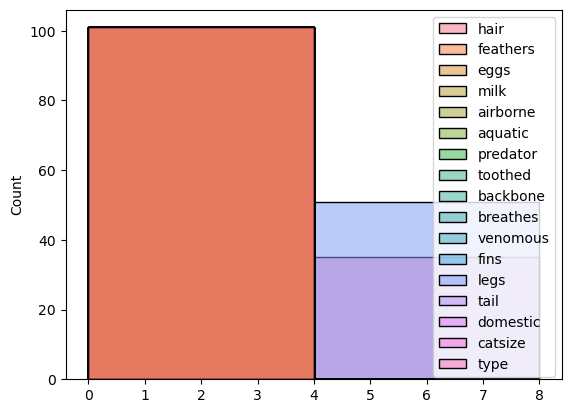

In [16]:
sns.histplot(df,bins=2)

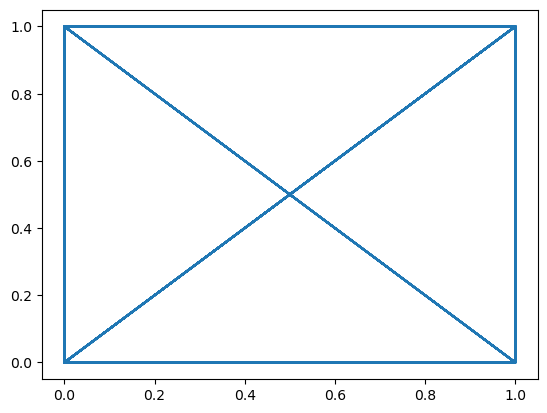

In [46]:
plt.plot(df['predator'],df['toothed'])

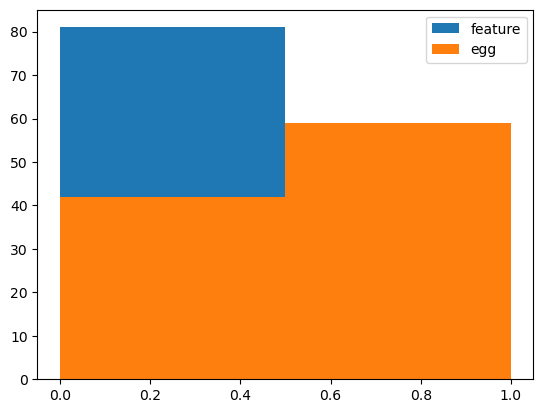

In [58]:
plt.hist(df['feathers'],bins=2,label='feature')
plt.hist(df['eggs'],bins=2,label='egg')
plt.legend()
plt.show()

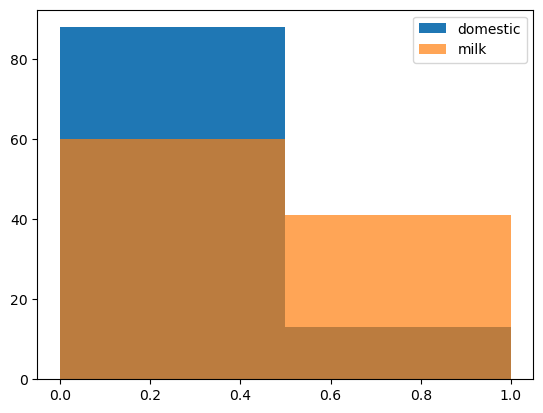

In [67]:
plt.hist(df['domestic'],bins=2,label='domestic')
plt.hist(df['milk'],bins=2,label='milk',alpha=0.7)
plt.legend()
plt.show()

Text(0, 0.5, 'Tails')

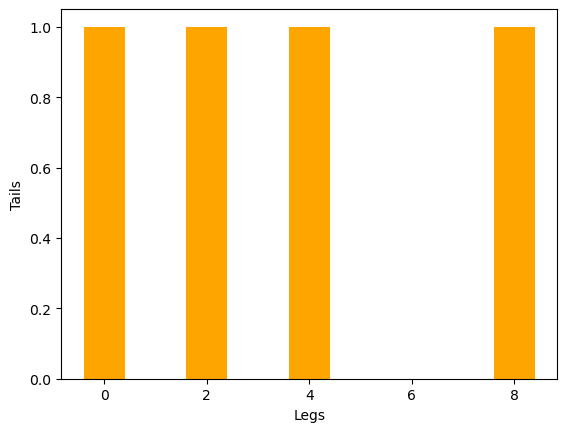

In [72]:
plt.bar(df['legs'],df['tail'],color='orange')
plt.xlabel('Legs')
plt.ylabel('Tails')

<Axes: >

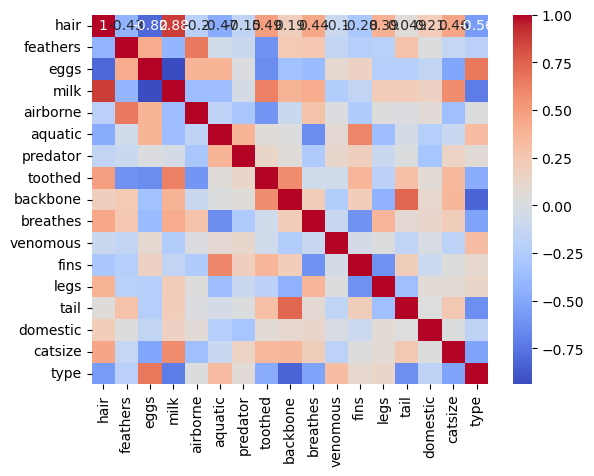

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

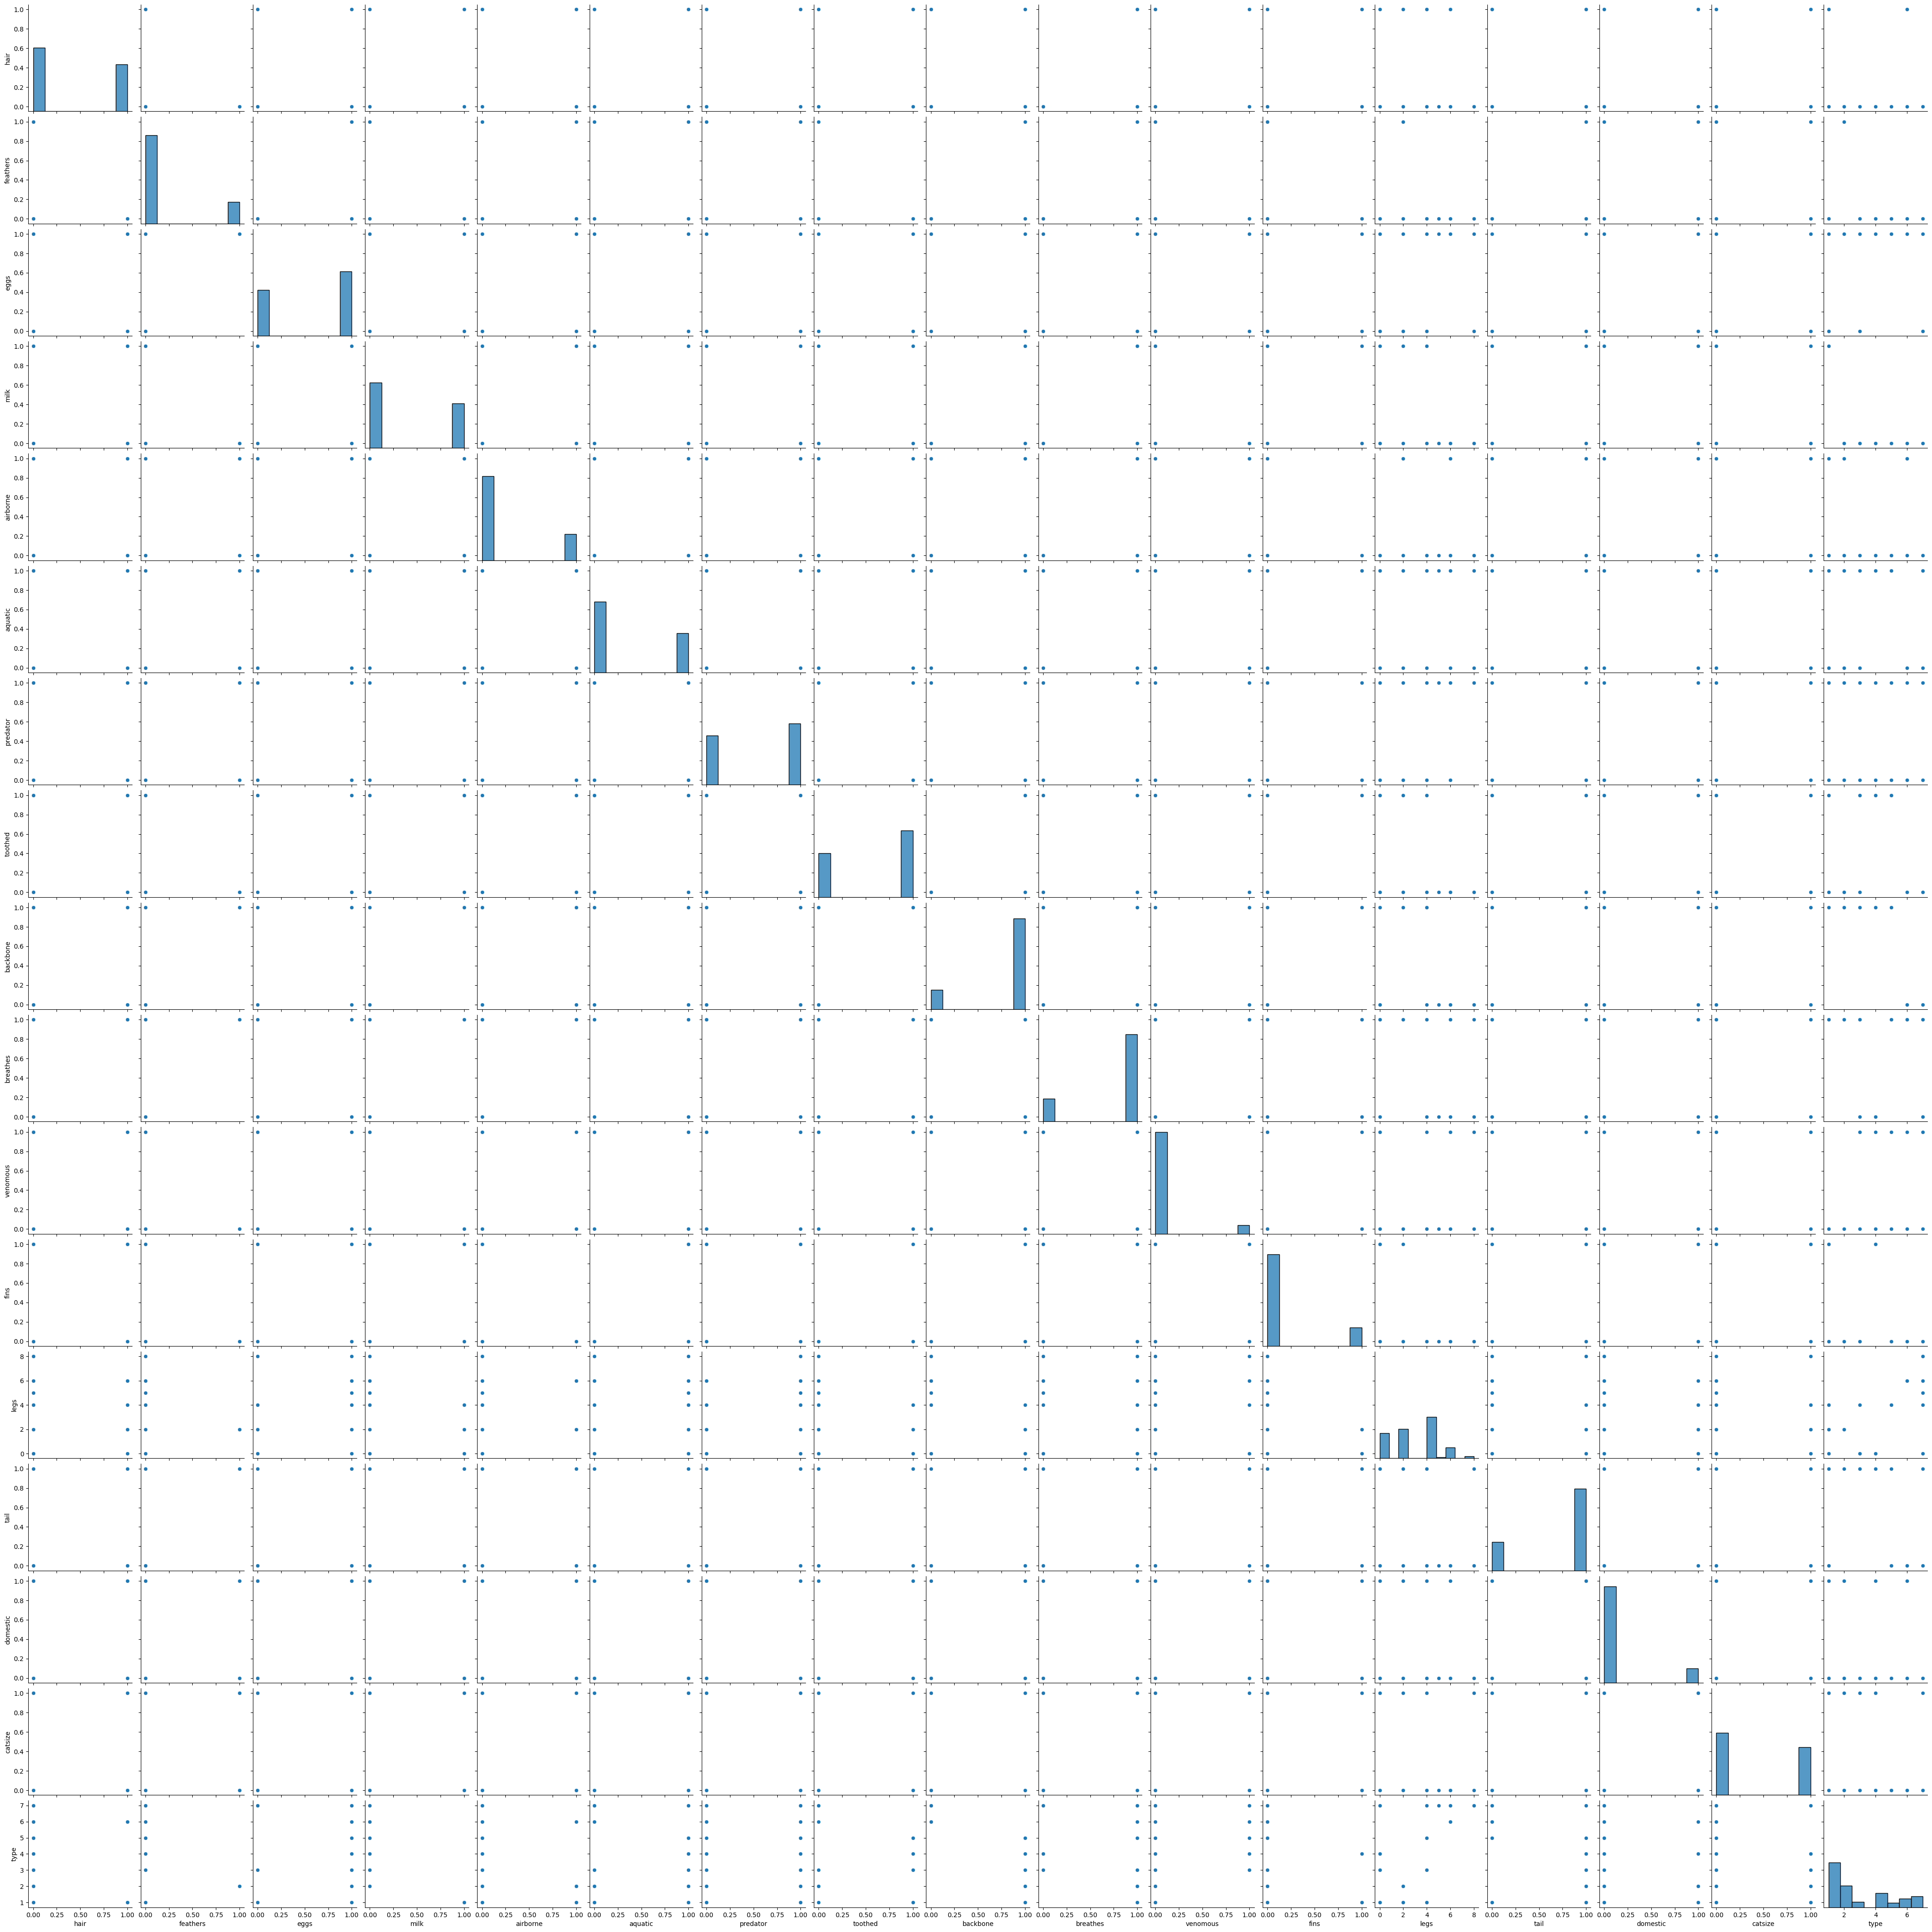

In [78]:
sns.pairplot(df)

## 2.
Preprocess the data by handling missing values & Outliers, if any.

In [81]:
print(df.isnull().sum())
print("There are no outiers in this dataset")

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64
There are no outiers in this dataset


## 3. 
Split the dataset into training and testing sets (80% training, 20% testing).

In [79]:
target = df[['type']]
feature = df.drop('type',axis=1)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.80,random_state=100)

## 4. 
Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)

In [84]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
y_pred = knn.predict(x_test)

In [86]:
accuracy_score(y_test,y_pred)

0.9523809523809523

## 5. 
Choose an appropriate distance metric and value for K.

In [95]:
parmas = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [96]:
grid_search = GridSearchCV(knn,parmas)

In [97]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [100]:
grid_search.best_params_

{'n_neighbors': 1}

In [101]:
knn = KNeighborsClassifier(n_neighbors=1)

In [102]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [103]:
y_pred1 = knn.predict(x_test)

In [104]:
accuracy_score(y_test,y_pred1)

0.9523809523809523

## 6. 
Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [107]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [108]:
accuracy_score(y_test,y_pred1)

0.9523809523809523

<Axes: xlabel='type'>

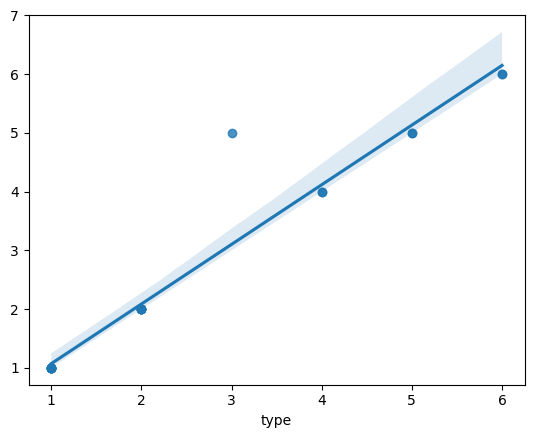

In [116]:
sns.regplot(data=df,x=y_test,y=y_pred1)

## Interview Questions:

1. What are the key hyperparameters in KNN?

2. What distance metrics can be used in KNN?


##
Answer 1:

The KNN have several hyperparameters that impacts the performance 'n_negibors', 'weights' and 'leaf_size' 


n_negibors is the number of neighbors to consider when making predictions.
weights parameter specifies the weight function used in prediction.
leaf_size  parameter is relevant when using the 'ball_tree' or 'kd_tree' algorithms.

Answer2:
Some commonly used distance metrics are 'Euclidean Distance', 'Manhattan Distance' and 'Chebyshev Distance'
Euclidean Distance calculates the straight-line distance between two points in Euclidean space
Manhattan Distance calculates the distance between two points by summing the absolute differences between their coordinates
Chebyshev Distance calculates the maximum absolute difference between the coordinates of two points along any dimension
